<a href="https://colab.research.google.com/github/ChiaoYunTing/Text-Analytics/blob/main/Lecture_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis

# Data Preprocessing

In [1]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text  # Remove HTML tags
    text = re.sub(r'[\W]', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.lower().strip()

# Example usage
dirty_text = "This is an <html>example</html> text with 😊"
cleaned_text = clean_text(dirty_text)
print(cleaned_text)


this is an example text with


# Sentiment Analysis Methods

# AFINN

The AFINN lexicon is used primarily in a sentiment analysis technique known as the lexicon-based approach. This approach involves assigning sentiment scores to individual words found in a text and then aggregating these scores to determine the overall sentiment of the text. The AFINN lexicon is particularly suited for this method due to its simplicity and direct mapping of words to numerical sentiment scores.

Key Characteristics of the AFINN Lexicon-Based Sentiment Analysis:
Scoring: Each word in the AFINN lexicon is assigned a score ranging from -5 to +5, where negative numbers represent negative sentiments and positive numbers represent positive sentiments. The score indicates the intensity of the sentiment.

Simplicity: The technique is straightforward to implement because it directly sums up the scores of the words that appear in the text. It does not require complex algorithms or machine learning models.

Efficiency: This approach can be very fast, making it suitable for applications that need to process large volumes of text quickly, such as real-time sentiment analysis on social media platforms.

Context Ignorance: While efficient and straightforward, the major drawback is that it generally ignores the context in which words are used. This can lead to inaccuracies, especially in texts where the sentiment is conveyed through sarcasm, irony, or context-dependent meanings.

AFINN is particularly favored for its ease of use and effectiveness in straightforward applications where context and linguistic subtlety are less critical.

In [2]:
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=b47913f14ee828189995a9ca70ec30242e7df37c5c29ae1dff0f0d1a9ac18073
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [3]:
from afinn import Afinn

afinn = Afinn()

# Example usage
score = afinn.score('This is excellent!')
print(score)  # Positive score


3.0


# SentiWordNet

SentiWordNet is utilized in sentiment analysis through a lexicon-based approach similar to AFINN, but it provides a more nuanced analysis by incorporating multiple sentiment scores for words based on their usage in different contexts (synsets). SentiWordNet, an extension of the widely used WordNet database, provides scores for positivity, negativity, and objectivity for each synset (group of synonymous words that share a common meaning).

Characteristics of SentiWordNet-Based Sentiment Analysis:
Synset-Based Scoring: Each entry (or synset) in WordNet, which can be a word or a phrase, has associated sentiment scores in SentiWordNet:

Positivity Score: Indicates how positive a synset is.
Negativity Score: Indicates how negative a synset is.
Objectivity Score: Indicates how objective, or neutral, a synset is.
Contextual Sensitivity: Unlike simpler lexicon-based methods that assign a single sentiment score to a word regardless of usage, SentiWordNet's linkage to WordNet synsets allows it to provide different sentiment scores depending on the context in which a word is used.

Sentiment Calculation: The overall sentiment of a text can be calculated by analyzing the sentiment scores of its constituent words based on their relevant synsets, taking into account the words’ part of speech and sense.

Complexity: This approach is more complex than using a straightforward dictionary like AFINN because it requires determining the correct sense of a word within its context before applying the sentiment scores.

Beyond simply classifying sentiments as positive or negative, SentiWordNet allows for measuring the degree of sentiment and objectivity, supporting more detailed analyses.SentiWordNet provides a rich lexical resource for sentiment analysis, especially useful in applications requiring a deep understanding of the lexical semantics of the language.

In [4]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

# Ensure that the necessary resources are downloaded
nltk.download('wordnet')
nltk.download('sentiwordnet')

def get_sentiment(word, pos=None):
    """Get the sentiment scores for the best sense of the word"""
    synsets = wn.synsets(word, pos=pos)
    if not synsets:
        return None

    # Choose the first synset as the most common usage
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
    return swn_synset.pos_score(), swn_synset.neg_score(), swn_synset.obj_score()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [5]:
# Example usage
word = 'excellent'
x = get_sentiment(word, pos=wn.ADJ)
print(x)

(1.0, 0.0, 0.0)


## TextBlob

TextBlob is another popular library for processing textual data in Python. It is particularly known for its simplicity and ease of use, providing a straightforward API for tackling common natural language processing (NLP) tasks, including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

Overview of TextBlob in Sentiment Analysis:

TextBlob’s sentiment analysis is built upon the pattern library, which itself is based on a lexicon similar to AFINN but includes an assessment of both polarity and subjectivity:

* Polarity: Measures the positivity or negativity of the text. The polarity score is a float within the range [-1.0, 1.0].
* Subjectivity: Measures the degree of personal opinion, emotion, or judgment within the text. The subjectivity score is a float within the range [0.0, 1.0].

Key Features of TextBlob:

* Ease of Use: TextBlob's API is very user-friendly, making it easy to perform complex NLP tasks with only a few lines of code.

* Language Support and Translation: TextBlob supports multiple languages for basic NLP tasks and can leverage Google Translate for text translation.

TextBlob fits well into the sentiment analysis toolkit as a versatile, easy-to-use option suitable for various texts. TextBlob assesses both the emotional leaning and the objective vs. subjective nature of the text.

In [8]:
from textblob import TextBlob

def analyze_sentiment_textblob(text):
    """Function to analyze sentiment using TextBlob's built-in sentiment analyzer."""
    return TextBlob(text).sentiment

# Example usage
example_text = "This is a really good product!"
sentiment = analyze_sentiment_textblob(example_text)
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")


Polarity: 0.875, Subjectivity: 0.6000000000000001


## VADER
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is different from other sentiment analysis tools like AFINN and SentiWordNet in several significant ways:

Key Features of VADER:

* Specifically Designed for Social Media: VADER was developed with a focus on social media contexts, taking into account the peculiarities and informal language used in tweets, Facebook posts, and other similar platforms.

* Rule-Based with a Sentiment Lexicon: VADER combines a sentiment lexicon (a list of lexical features e.g., words, emoji) that are generally labeled according to their semantic orientation as either positive or negative. What makes VADER particularly powerful is that it also incorporates grammatical and syntactical rules to determine sentiment, which helps capture more nuances than typical lexicons.

* Handles Slang and Emoticons: It understands modern slang used on social media (e.g., "sux", "lol") and includes a robust set of emoticons. This feature is crucial for analyzing contemporary sentiment expressions on social media effectively.

* Contextual Awareness: VADER not only scores words but also considers context. For example, it intensifies the sentiment if it detects an exclamation mark or diminishes it if it detects words like "kind of" or "sort of".

How VADER Differs from AFINN and SentiWordNet:

* AFINN: AFINN provides a list of words rated from -5 to +5. It is straightforward and simple, assigning scores to words without considering context or any modifiers. It does not account for slang, emoticons, or idiomatic phrases often found in social media, making it less effective for such platforms compared to VADER.

* SentiWordNet: This is an extension of WordNet which provides scores for positivity, negativity, and objectivity for each WordNet synset (group of synonymous words). While SentiWordNet is more sophisticated than AFINN in handling context due to its association with specific meanings of words, it lacks the built-in rules for handling the dynamics of sentence-level sentiment, modifiers, or contemporary slang and emojis, making it less suitable for on-the-fly social media sentiment analysis compared to VADER.

In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
print(sid.polarity_scores('This is amazingly bad!'))


{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'compound': -0.623}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Transformer based Sentiment Analysis

BERT and its variants (like RoBERTa, DistilBERT, etc.) represent a significant shift in how machines understand human languages due to their architecture and training approaches, which allow them to capture the context of every word in a text in relation to all the other words in the sentence, rather than in one-direction at a time.

Key Features of BERT for Sentiment Analysis:

* Contextual Understanding: BERT’s most significant feature is its ability to consider the full context of a word by looking at the words that come before and after it. This is a considerable advantage for sentiment analysis, especially in handling sentences where the meaning can significantly change based on context or word placement.

* Pre-training on Large Corpuses: BERT is pre-trained on a vast corpus of text from the internet, which gives it a broad understanding of language and context before it is even fine-tuned for specific tasks like sentiment analysis.

Comparison with Other Sentiment Analysis Tools:

* TextBlob & AFINN: These tools use static lexicons or simple rule-based approaches for sentiment analysis. They do not account for the context in which a word appears, which can lead to inaccurate sentiment analysis in more complex sentences. BERT, by contrast, considers the entire sentence structure, which helps in understanding context-dependent meanings.


* VADER: VADER is highly tuned for social media and can interpret slang, emojis, and emoticons effectively. While BERT can also be fine-tuned for social media text, it would require specific training data reflecting these nuances. VADER is out-of-the-box ready for social media, whereas BERT would need some adaptation.

* SentiWordNet: Unlike SentiWordNet, which provides scores based on word senses, BERT evaluates the sentiment based on the overall sentence semantics, making it much more robust for sentences where multiple word senses are involved.

BERTSentiment, leveraging models like BERT, fits into sentiment analysis as a high-performance tool capable of understanding nuanced and context-dependent language, making it superior for applications requiring a deep understanding of text sentiment. It is particularly effective in environments where the context significantly impacts meaning, such as in customer feedback, movie reviews, and other forms of textual analysis where traditional lexicons might fall short. Its use, however, requires more computational resources compared to simpler tools like TextBlob or VADER, and it might be considered overkill for simpler applications.

In [11]:
%pip install transformers

In [12]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Analyze sentiment
result = sentiment_pipeline("I love using transformers for natural language processing!")
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9987679123878479}]


# Complexities of language


# Complex sentiments

In [13]:
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from transformers import pipeline
nlp = pipeline("sentiment-analysis")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.



Let us try the following sentences and capture the sentiment.

"The movie isn't really all that great."

"Oh great, another rainy day."

 "I’m not unhappy with how things turned out."

 "is this good - more I think about it I do no think so"

 "This camera fails to impress me."

 "This product is barely functional"

 "What a great car, it did not start the first day."

 "Trying out Chrome because Firefox keeps crashing"

"For paintX, one coat can cover the wood color"

"For paintY, we need three coats to cover the wood color"

"hello :-) ;-)"

In [16]:
texts = [
    "No, I am good.",
    "I am no good.",
    "The movie isn't really all that great.",
    "Oh great, another rainy day.",
    "I’m not unhappy with how things turned out.",
    "is this good - more I think about it I do no think so",
    "This camera fails to impress me.",
    "This product is barely functional.",
    "What a great car, it did not start the first day.",
    "Trying out Chrome because Firefox keeps crashing.",
    "For paintX, one coat can cover the wood color.",
    "For paintY, we need three coats to cover the wood color.",
    "hello :-) ;-)"
]

In [17]:
import pandas as pd

# List to collect the sentiment data
data = []

# Iterate through each text to analyze sentiment
for text in texts:
    # TextBlob sentiment
    blob = TextBlob(text)
    tb_sentiment = blob.sentiment

    # VADER sentiment
    vader_sentiment = sid.polarity_scores(text)

    # BERT sentiment
    bert_result = nlp(text)

    # Append results to data list
    data.append({
        "Text": text,
        "TextBlob Sentiment": tb_sentiment[0],
        "VADER Compound Score": vader_sentiment['compound'],
        "BERT Sentiment": bert_result[0]['label'],
        "BERT Score": bert_result[0]['score'],
    })

# Create DataFrame from the collected data
sentiment_df = pd.DataFrame(data)
sentiment_df

,Text,TextBlob Sentiment,VADER Compound Score,BERT Sentiment,BERT Score
0,"No, I am good.",0.700,0.1779,POSITIVE,0.999503
1,I am no good.,-0.350,0.1779,NEGATIVE,0.999605
2,The movie isn't really all that great.,0.500,0.6557,NEGATIVE,0.999659
3,"Oh great, another rainy day.",0.800,0.5859,POSITIVE,0.985306
4,I’m not unhappy with how things turned out.,0.300,0.3252,POSITIVE,0.996785
5,is this good - more I think about it I do no t...,0.600,0.1779,POSITIVE,0.999830
6,This camera fails to impress me.,-0.500,0.0258,NEGATIVE,0.999775
7,This product is barely functional.,0.050,0.0000,NEGATIVE,0.999817
8,"What a great car, it did not start the first day.",0.525,0.6249,NEGATIVE,0.977874
9,Trying out Chrome because Firefox keeps crashing.,0.000,0.0000,NEGATIVE,0.996089


##Slang

In [ ]:
# Read the slang lexicon
slang_df = pd.read_csv("slang_lexicon.csv")
slang_df.head()

In [ ]:
# Convert the DataFrame into a dictionary with lower case keys
slang_dict = pd.Series(slang_df['explanation'].values, index=slang_df['slang'].str.lower()).to_dict()


In [ ]:
# Replace slang
import re

def replace_slang(text, slang_dict):
    # Use regex to extract words, keeping them only and converting text to lower case for matching
    words = re.findall(r'\b\w+\b', text.lower())  # Extracts words and converts them to lower case
    # Replace each word with the corresponding explanation if it exists in the dictionary
    return ' '.join([slang_dict.get(word, word) for word in words])

In [ ]:
# Example usage
text_with_slang = "BRB, going to the store, LOL!"
cleaned_text = replace_slang(text_with_slang, slang_dict)
print(cleaned_text)

text_with_slang = "tbh, icymi i was like ok"
cleaned_text = replace_slang(text_with_slang, slang_dict)
print(cleaned_text)

# Your Turn
1. Conduct sentiment analysis on `sms_spam.csv`. Assess if the average sentiment of the text is related to whether the message is 'ham' or 'spam'.
2. Open the `kickstarter.csv` file, which contains information about various Kickstarter projects, such as their title, description, funding goal, number of backers, and state (successful, failed, canceled, etc.). The file was downloaded from https://webrobots.io/kickstarter-datasets/. Conduct sentiment analysis on the variable `blurb` and assess whether the sentiment is related to `state` which has values successful, failed, and canceled.


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/sms_spam.csv')

In [19]:
df

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [21]:
texts = df['text']
texts

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                Will Ã¼ b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: text, Length: 5574, dtype: object

In [23]:
# List to collect the sentiment data
data = []

# Iterate through each text to analyze sentiment
for text in texts:
    # TextBlob sentiment
    blob = TextBlob(text)
    tb_sentiment = blob.sentiment

    # VADER sentiment
    vader_sentiment = sid.polarity_scores(text)

    # Append results to data list
    data.append({
        "Text": text,
        "TextBlob Sentiment": tb_sentiment[0],
        "VADER Compound Score": vader_sentiment['compound']
    })


In [24]:
# Create DataFrame from the collected data
sentiment_df = pd.DataFrame(data)
sentiment_df

,Text,TextBlob Sentiment,VADER Compound Score
0,"Go until jurong point, crazy.. Available only ...",0.150000,0.6249
1,Ok lar... Joking wif u oni...,0.500000,0.4767
2,Free entry in 2 a wkly comp to win FA Cup fina...,0.300000,0.7964
3,U dun say so early hor... U c already then say...,0.100000,0.0000
4,"Nah I don't think he goes to usf, he lives aro...",0.000000,-0.1027
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,0.180556,0.8805
5570,Will Ã¼ b going to esplanade fr home?,0.000000,0.0000
5571,"Pity, * was in mood for that. So...any other s...",-0.112500,-0.2960
5572,The guy did some bitching but I acted like i'd...,0.216667,0.8934


In [27]:
#combine sentiment score with original df
df['VADER Compound Score'] = sentiment_df['VADER Compound Score']
df['TextBlob Sentiment'] = sentiment_df['TextBlob Sentiment']
df

,type,text,VADER Compound Score,TextBlob Sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",0.6249,0.150000
1,ham,Ok lar... Joking wif u oni...,0.4767,0.500000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.7964,0.300000
3,ham,U dun say so early hor... U c already then say...,0.0000,0.100000
4,ham,"Nah I don't think he goes to usf, he lives aro...",-0.1027,0.000000
...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,0.8805,0.180556
5570,ham,Will Ã¼ b going to esplanade fr home?,0.0000,0.000000
5571,ham,"Pity, * was in mood for that. So...any other s...",-0.2960,-0.112500
5572,ham,The guy did some bitching but I acted like i'd...,0.8934,0.216667


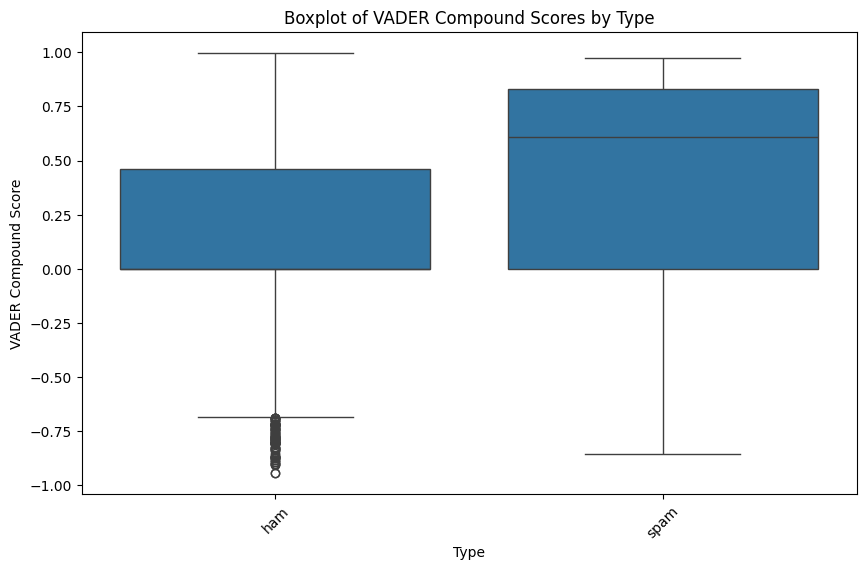

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns 'type' and 'VADER Compound Score'
# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
sns.boxplot(x='type', y='VADER Compound Score', data=df)

plt.title('Boxplot of VADER Compound Scores by Type')  # Title for the boxplot
plt.xlabel('Type')  # Label for the x-axis
plt.ylabel('VADER Compound Score')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap or for better readability

plt.show()


## kickstarter

In [31]:
df = pd.read_csv('Kickstarter072.csv', on_bad_lines='skip')

In [32]:
df

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,video
0,18,Long live independent media! Social web/mobile...,"{""id"":239,""name"":""Radio & Podcasts"",""analytics...",762.0,US,the United States,1397940608,"{""id"":1009166616,""name"":""Handan Selcuk"",""is_re...",USD,$,...,False,True,canceled,1402694674,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,762.000000,international,"{""id"":387119,""status"":""successful"",""hls"":null,..."
1,24,Self Transformation tarot & other creative too...,"{""id"":54,""name"":""Mixed Media"",""analytics_name""...",1560.0,US,the United States,1529213359,"{""id"":1527074479,""name"":""Alia Shanti Gumbo"",""i...",USD,$,...,False,False,failed,1541044333,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,1560.000000,international,"{""id"":915609,""status"":""successful"",""hls"":""http..."
2,11,Fine art nude photography of RAMEN is showcase...,"{""id"":276,""name"":""Fine Art"",""analytics_name"":""...",518.0,US,the United States,1464833780,"{""id"":2039317553,""name"":""badgirlartwork.com"",""...",USD,$,...,True,False,successful,1465609792,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,518.000000,international,NaN
3,15,Fine art nude photography of DAKOTA is showcas...,"{""id"":276,""name"":""Fine Art"",""analytics_name"":""...",675.0,US,the United States,1464651085,"{""id"":316444840,""name"":""NightstormWest (delete...",USD,$,...,True,False,successful,1465495442,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,675.000000,international,NaN
4,347,Kevin & Nicola Tickle's debut Inn...,"{""id"":312,""name"":""Restaurants"",""analytics_name...",63525.0,GB,the United Kingdom,1609357915,"{""id"":1236462167,""name"":""Heft, Inn + Restauran...",GBP,£,...,True,False,successful,1615395600,1.40165,"{""web"":{""project"":""https://www.kickstarter.com...",1.386497,64219.484253,international,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,1,A Floating Food Truck,"{""id"":311,""name"":""Food Trucks"",""analytics_name...",1.0,US,the United States,1612110231,"{""id"":749058462,""name"":""Stacey Vogl"",""slug"":""t...",USD,$,...,False,False,failed,1613858647,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,1.000000,international,NaN
2257,2,Good authentic traditional Cuban food brought ...,"{""id"":311,""name"":""Food Trucks"",""analytics_name...",16.0,US,the United States,1601244368,"{""id"":1497413582,""name"":""Ivan Rojas"",""slug"":""t...",USD,$,...,False,False,failed,1613021604,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,16.000000,international,"{""id"":1060059,""status"":""successful"",""hls"":""htt..."
2258,49,iGIVEaSmile virtual greeting card app. Add a l...,"{""id"":21,""name"":""Digital Art"",""analytics_name""...",5166.0,US,the United States,1395094181,"{""id"":1430440551,""name"":""Gail Slatter Folwell""...",USD,$,...,True,False,successful,1401537944,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,5166.000000,international,"{""id"":378933,""status"":""successful"",""hls"":null,..."
2259,40,All Changes Apply has been a band for almost 3...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",2020.0,US,the United States,1355849342,"{""id"":1599302718,""name"":""All Changes Apply"",""i...",USD,$,...,True,False,successful,1387472438,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,2020.000000,international,"{""id"":321113,""status"":""successful"",""hls"":null,..."


In [33]:
new_df = df[['blurb', 'state']]

In [34]:
new_df

,blurb,state
0,Long live independent media! Social web/mobile...,canceled
1,Self Transformation tarot & other creative too...,failed
2,Fine art nude photography of RAMEN is showcase...,successful
3,Fine art nude photography of DAKOTA is showcas...,successful
4,Kevin & Nicola Tickle's debut Inn...,successful
...,...,...
2256,A Floating Food Truck,failed
2257,Good authentic traditional Cuban food brought ...,failed
2258,iGIVEaSmile virtual greeting card app. Add a l...,successful
2259,All Changes Apply has been a band for almost 3...,successful


In [37]:
import pandas as pd
import re
import nltk

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
#process data
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return ' '.join(tokens)

In [40]:
new_df['text'] = df['blurb'].apply(preprocess_text)
new_df

<ipython-input-40-8a4b84be5875>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'] = df['blurb'].apply(preprocess_text)


,blurb,state,text
0,Long live independent media! Social web/mobile...,canceled,long live independent media social platform un...
1,Self Transformation tarot & other creative too...,failed,self transformation tarot creative tools assis...
2,Fine art nude photography of RAMEN is showcase...,successful,fine art nude photography ramen showcased limi...
3,Fine art nude photography of DAKOTA is showcas...,successful,fine art nude photography dakota showcased lim...
4,Kevin & Nicola Tickle's debut Inn...,successful,kevin nicola tickle debut inn
...,...,...,...
2256,A Floating Food Truck,failed,floating food truck
2257,Good authentic traditional Cuban food brought ...,failed,good authentic traditional cuban food brought ...
2258,iGIVEaSmile virtual greeting card app. Add a l...,successful,igiveasmile virtual greeting card app add litt...
2259,All Changes Apply has been a band for almost 3...,successful,changes apply band almost years ready record f...


In [42]:
#sentiment analysis
texts = new_df['text']

# List to collect the sentiment data
data = []

# Iterate through each text to analyze sentiment
for text in texts:
    # TextBlob sentiment
    blob = TextBlob(text)
    tb_sentiment = blob.sentiment

    # VADER sentiment
    vader_sentiment = sid.polarity_scores(text)

    # Append results to data list
    data.append({
        "Text": text,
        "TextBlob Sentiment": tb_sentiment[0],
        "VADER Compound Score": vader_sentiment['compound']
    })

# Create DataFrame from the collected data
sentiment_df = pd.DataFrame(data)
sentiment_df

,Text,TextBlob Sentiment,VADER Compound Score
0,long live independent media social platform un...,0.029924,0.0000
1,self transformation tarot creative tools assis...,0.250000,0.5423
2,fine art nude photography ramen showcased limi...,0.115079,-0.0258
3,fine art nude photography dakota showcased lim...,0.198413,-0.0258
4,kevin nicola tickle debut inn,0.000000,0.0000
...,...,...,...
2256,floating food truck,0.000000,0.0000
2257,good authentic traditional cuban food brought ...,0.240000,0.4404
2258,igiveasmile virtual greeting card app add litt...,0.234375,0.9506
2259,changes apply band almost years ready record f...,0.183333,0.3008


In [45]:
#combine sentiment result
new_df['TextBlob Sentiment'] = sentiment_df['TextBlob Sentiment']
new_df['VADER Compound Score'] = sentiment_df['VADER Compound Score']
new_df

<ipython-input-45-9225d8c6639d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['TextBlob Sentiment'] = sentiment_df['TextBlob Sentiment']
<ipython-input-45-9225d8c6639d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['VADER Compound Score'] = sentiment_df['VADER Compound Score']


,blurb,state,text,TextBlob Sentiment,VADER Compound Score
0,Long live independent media! Social web/mobile...,canceled,long live independent media social platform un...,0.029924,0.0000
1,Self Transformation tarot & other creative too...,failed,self transformation tarot creative tools assis...,0.250000,0.5423
2,Fine art nude photography of RAMEN is showcase...,successful,fine art nude photography ramen showcased limi...,0.115079,-0.0258
3,Fine art nude photography of DAKOTA is showcas...,successful,fine art nude photography dakota showcased lim...,0.198413,-0.0258
4,Kevin & Nicola Tickle's debut Inn...,successful,kevin nicola tickle debut inn,0.000000,0.0000
...,...,...,...,...,...
2256,A Floating Food Truck,failed,floating food truck,0.000000,0.0000
2257,Good authentic traditional Cuban food brought ...,failed,good authentic traditional cuban food brought ...,0.240000,0.4404
2258,iGIVEaSmile virtual greeting card app. Add a l...,successful,igiveasmile virtual greeting card app add litt...,0.234375,0.9506
2259,All Changes Apply has been a band for almost 3...,successful,changes apply band almost years ready record f...,0.183333,0.3008


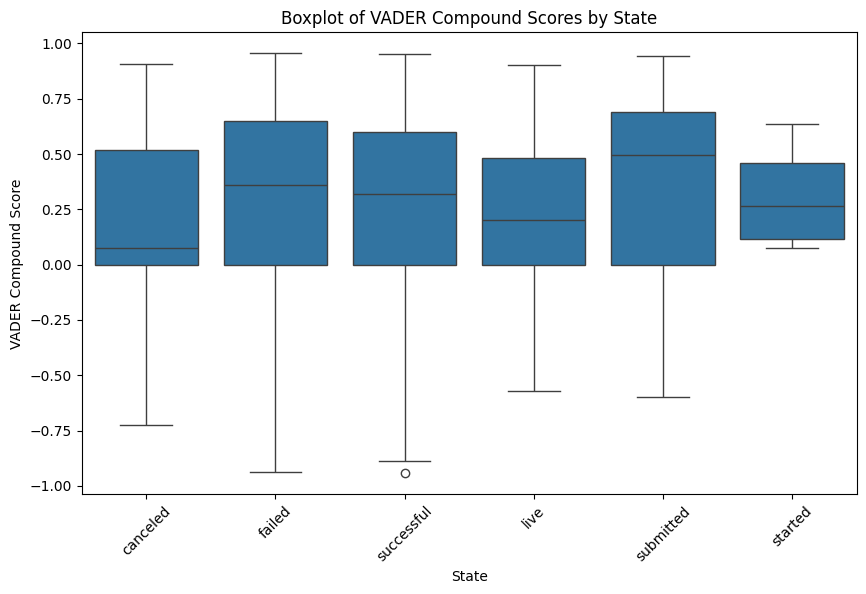

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns 'type' and 'VADER Compound Score'
# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
sns.boxplot(x='state', y='VADER Compound Score', data=new_df)

plt.title('Boxplot of VADER Compound Scores by State')  # Title for the boxplot
plt.xlabel('State')  # Label for the x-axis
plt.ylabel('VADER Compound Score')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap or for better readability

plt.show()

# Lexicons

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Access the lexicon (which is a dictionary of words and their scores)
vader_lexicon = sid.lexicon

# Print some entries from the lexicon
print({word: score for word, score in list(vader_lexicon.items())[:100]})

## Download the lexicons

In [ ]:
pip install afinn

In [ ]:
# AFINN
import csv
from afinn import Afinn

def export_afinn_to_csv(file_path):
    # Initialize Afinn and access the wordlist
    afinn = Afinn()

    # AFINN wordlist is accessible as a dictionary {word: score}
    wordlist = afinn._dict

    # Write to CSV
    with open(file_path, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Word', 'Score'])  # header row
        for word, score in wordlist.items():
            writer.writerow([word, score])

# Specify the path for your CSV file
export_afinn_to_csv('afinn_lexicon.csv')


In [ ]:
# VADER
import csv

# Write the VADER lexicon to a CSV file
with open('vader_lexicon.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Token', 'Sentiment Score'])
    for key, value in vader_lexicon.items():
        writer.writerow([key, value])

In [ ]:
# Sentiwordnet - takes long to run
import csv
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

nltk.download('sentiwordnet')
nltk.download('wordnet')

# Function to get sentiment data
def get_sentiwordnet_data():
    data = []
    # Iterate over all the synset terms in the WordNet
    for synset in wn.all_synsets():
        # Get SentiWordNet synset equivalent
        senti_synset = swn.senti_synset(synset.name())
        if senti_synset:
            # Prepare data that includes the synset name, its positive, negative, and objective scores
            data.append([
                synset.name(),
                synset.definition(),
                senti_synset.pos_score(),
                senti_synset.neg_score(),
                senti_synset.obj_score()
            ])
    return data

# Get the data from SentiWordNet
senti_data = get_sentiwordnet_data()

# Write the data to a CSV file
with open('sentiwordnet.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Synset', 'Definition', 'Positive Score', 'Negative Score', 'Objective Score'])
    writer.writerows(senti_data)

print("SentiWordNet data has been written to 'sentiwordnet.csv'.")
